In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:

df = pd.read_csv("Housing.csv")

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
print(df.isnull().sum())


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [7]:
encoder = OneHotEncoder(drop="first", sparse_output=False)  
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
encoded_data = encoder.fit_transform(df[categorical_cols])


encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_df], axis=1)


In [8]:
scaler = StandardScaler()
df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']] = scaler.fit_transform(df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])


In [9]:
X = df.drop(columns=["price"])  
y = df["price"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [11]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [12]:
y_pred_lr = lr_model.predict(X_test)  
y_pred_rf = rf_model.predict(X_test) 


In [13]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"Model: {model_name}")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_true, y_pred))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R-squared Score:", r2_score(y_true, y_pred))
    print("="*40)

evaluate_model(y_test, y_pred_lr, "Linear Regression")

evaluate_model(y_test, y_pred_rf, "Random Forest")


Model: Linear Regression
Mean Absolute Error (MAE): 970043.4039201642
Mean Squared Error (MSE): 1754318687330.6682
Root Mean Squared Error (RMSE): 1324506.9600914402
R-squared Score: 0.6529242642153175
Model: Random Forest
Mean Absolute Error (MAE): 1017470.6224770641
Mean Squared Error (MSE): 1959406221695.9854
Root Mean Squared Error (RMSE): 1399787.9202564885
R-squared Score: 0.6123495913214113


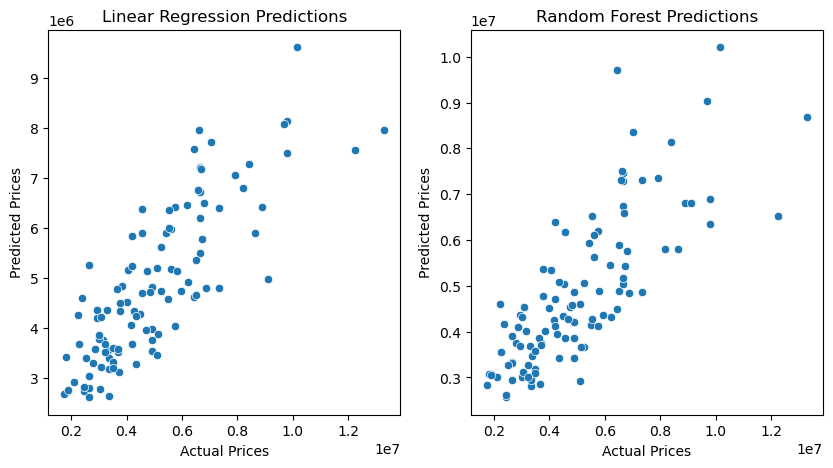

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression Predictions")

plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest Predictions")

plt.show()
